# Find Chemical Potential that Produces Some Average Gamma

The linker length distribution is highly dependent on the binding state of the system. The binding state of the system is highly dependent on the chemical potential. Search for a chemical potential that produces a linker length distribution with a desired average gamma value.

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-9.7])

In [4]:
# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

In [5]:
# Let's force the mark profile to match the one that should produce phase separation
marks = np.array(
    [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 2., 1., 1., 1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0.]
)
marks = np.atleast_2d(marks).T

In [6]:
# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

# Initialize linker lengths
linker_lengths = np.random.exponential(linker_corr_length, size=marks.shape[0])
linker_lengths = np.maximum(linker_lengths, 1.0)
linker_lengths = linker_lengths.astype(int)

In [7]:
print(f"Linker Lengths: \n\n{linker_lengths}")

Linker Lengths: 

[ 93  27  86   1  41  92  16  22  41  44  37   1  51 163 135  78   4  30
  28  77  32   4  30  23  27  32  51  86  70  59  78  61  66  13  24   6
  74  17   7  20  80  18   5   7 142  27   2  23  19   9  82 101  39  19
  12   7  35  16  20  36  62 128  19  65  48  53  27  20  53  10  66   1
  28  41  32   4 118  57  31  56  25  13  28 125  18  73   7  12  11 201
  23 152  31  16  74  26  47 100 156  17   1  71  89  57  34 175  87   8
  34   6  97   3  27  18   1  11   6  31  84  56 151  39  75  74   2  93
  33  95  80  57  28  19   1   8  16   6  55  13  37  25   4  68 156  34
  78   7  10   4 149  11  42   1  35  39  45  20 117  12  40  12  44  70
  16  22   8  65  13  56  17  27  38  82 135  12   3  41  28  41  60 205
  13  22   1 108  60 128  52  36  72   7  57   2 168 125   1  23 132  42
  59  29 113  17   4  85  72  59  37  27  42   4  84  99  43   3  10  35
  18  29 109  18  16  29  17  20  24  14  38   6  17  36   1  28  64  11
  66  33  36   5   3  79 123   3 

#### Initialize the Nucleosome Array

In [8]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

In [9]:
print(f"Average Gamma: {np.average(nuc_arr.gamma)}")

Average Gamma: 0.244


#### Specify Parameters for Linker Simulation

In [10]:
n_snap = 1
n_steps_per_snap = 20000

#### Perform a Binary Search to Find Chemical Potential that Produces Desired Average Gamma

In [11]:
target_avg_gamma = 0.5
mu_lower = -10.
mu_upper = -8.
rtol = 0.05

mu = mc.find_mu_for_avg_gamma(
    nuc_arr,
    linker_corr_length,
    mu_lower,
    mu_upper,
    target_avg_gamma,
    n_snap,
    n_steps_per_snap,
    rtol=rtol
)

Iteration 1 of 100
Mu: -9.0, Avg. Gamma: 0.578
Iteration 2 of 100
Mu: -9.5, Avg. Gamma: 0.248
Iteration 3 of 100
Mu: -9.25, Avg. Gamma: 0.384
Iteration 4 of 100
Mu: -9.125, Avg. Gamma: 0.41
Iteration 5 of 100
Mu: -9.0625, Avg. Gamma: 0.396
Iteration 6 of 100
Mu: -9.03125, Avg. Gamma: 0.556
Iteration 7 of 100
Mu: -9.046875, Avg. Gamma: 0.398
Iteration 8 of 100
Mu: -9.0390625, Avg. Gamma: 0.532
Iteration 9 of 100
Mu: -9.04296875, Avg. Gamma: 0.5
Converged!


#### Model the Chromatin Fiber at the Desired Average Gamma

In [12]:
print(f"Mu for Desired Gamma: {mu}")

# Initialize nucleosome array
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = [mu],
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

# Simulate linker lengths
nuc_arr = mc.mc_linkers(nuc_arr, n_snap, n_steps_per_snap)
linker_lengths = nuc_arr.linker_lengths

Mu for Desired Gamma: -9.04296875


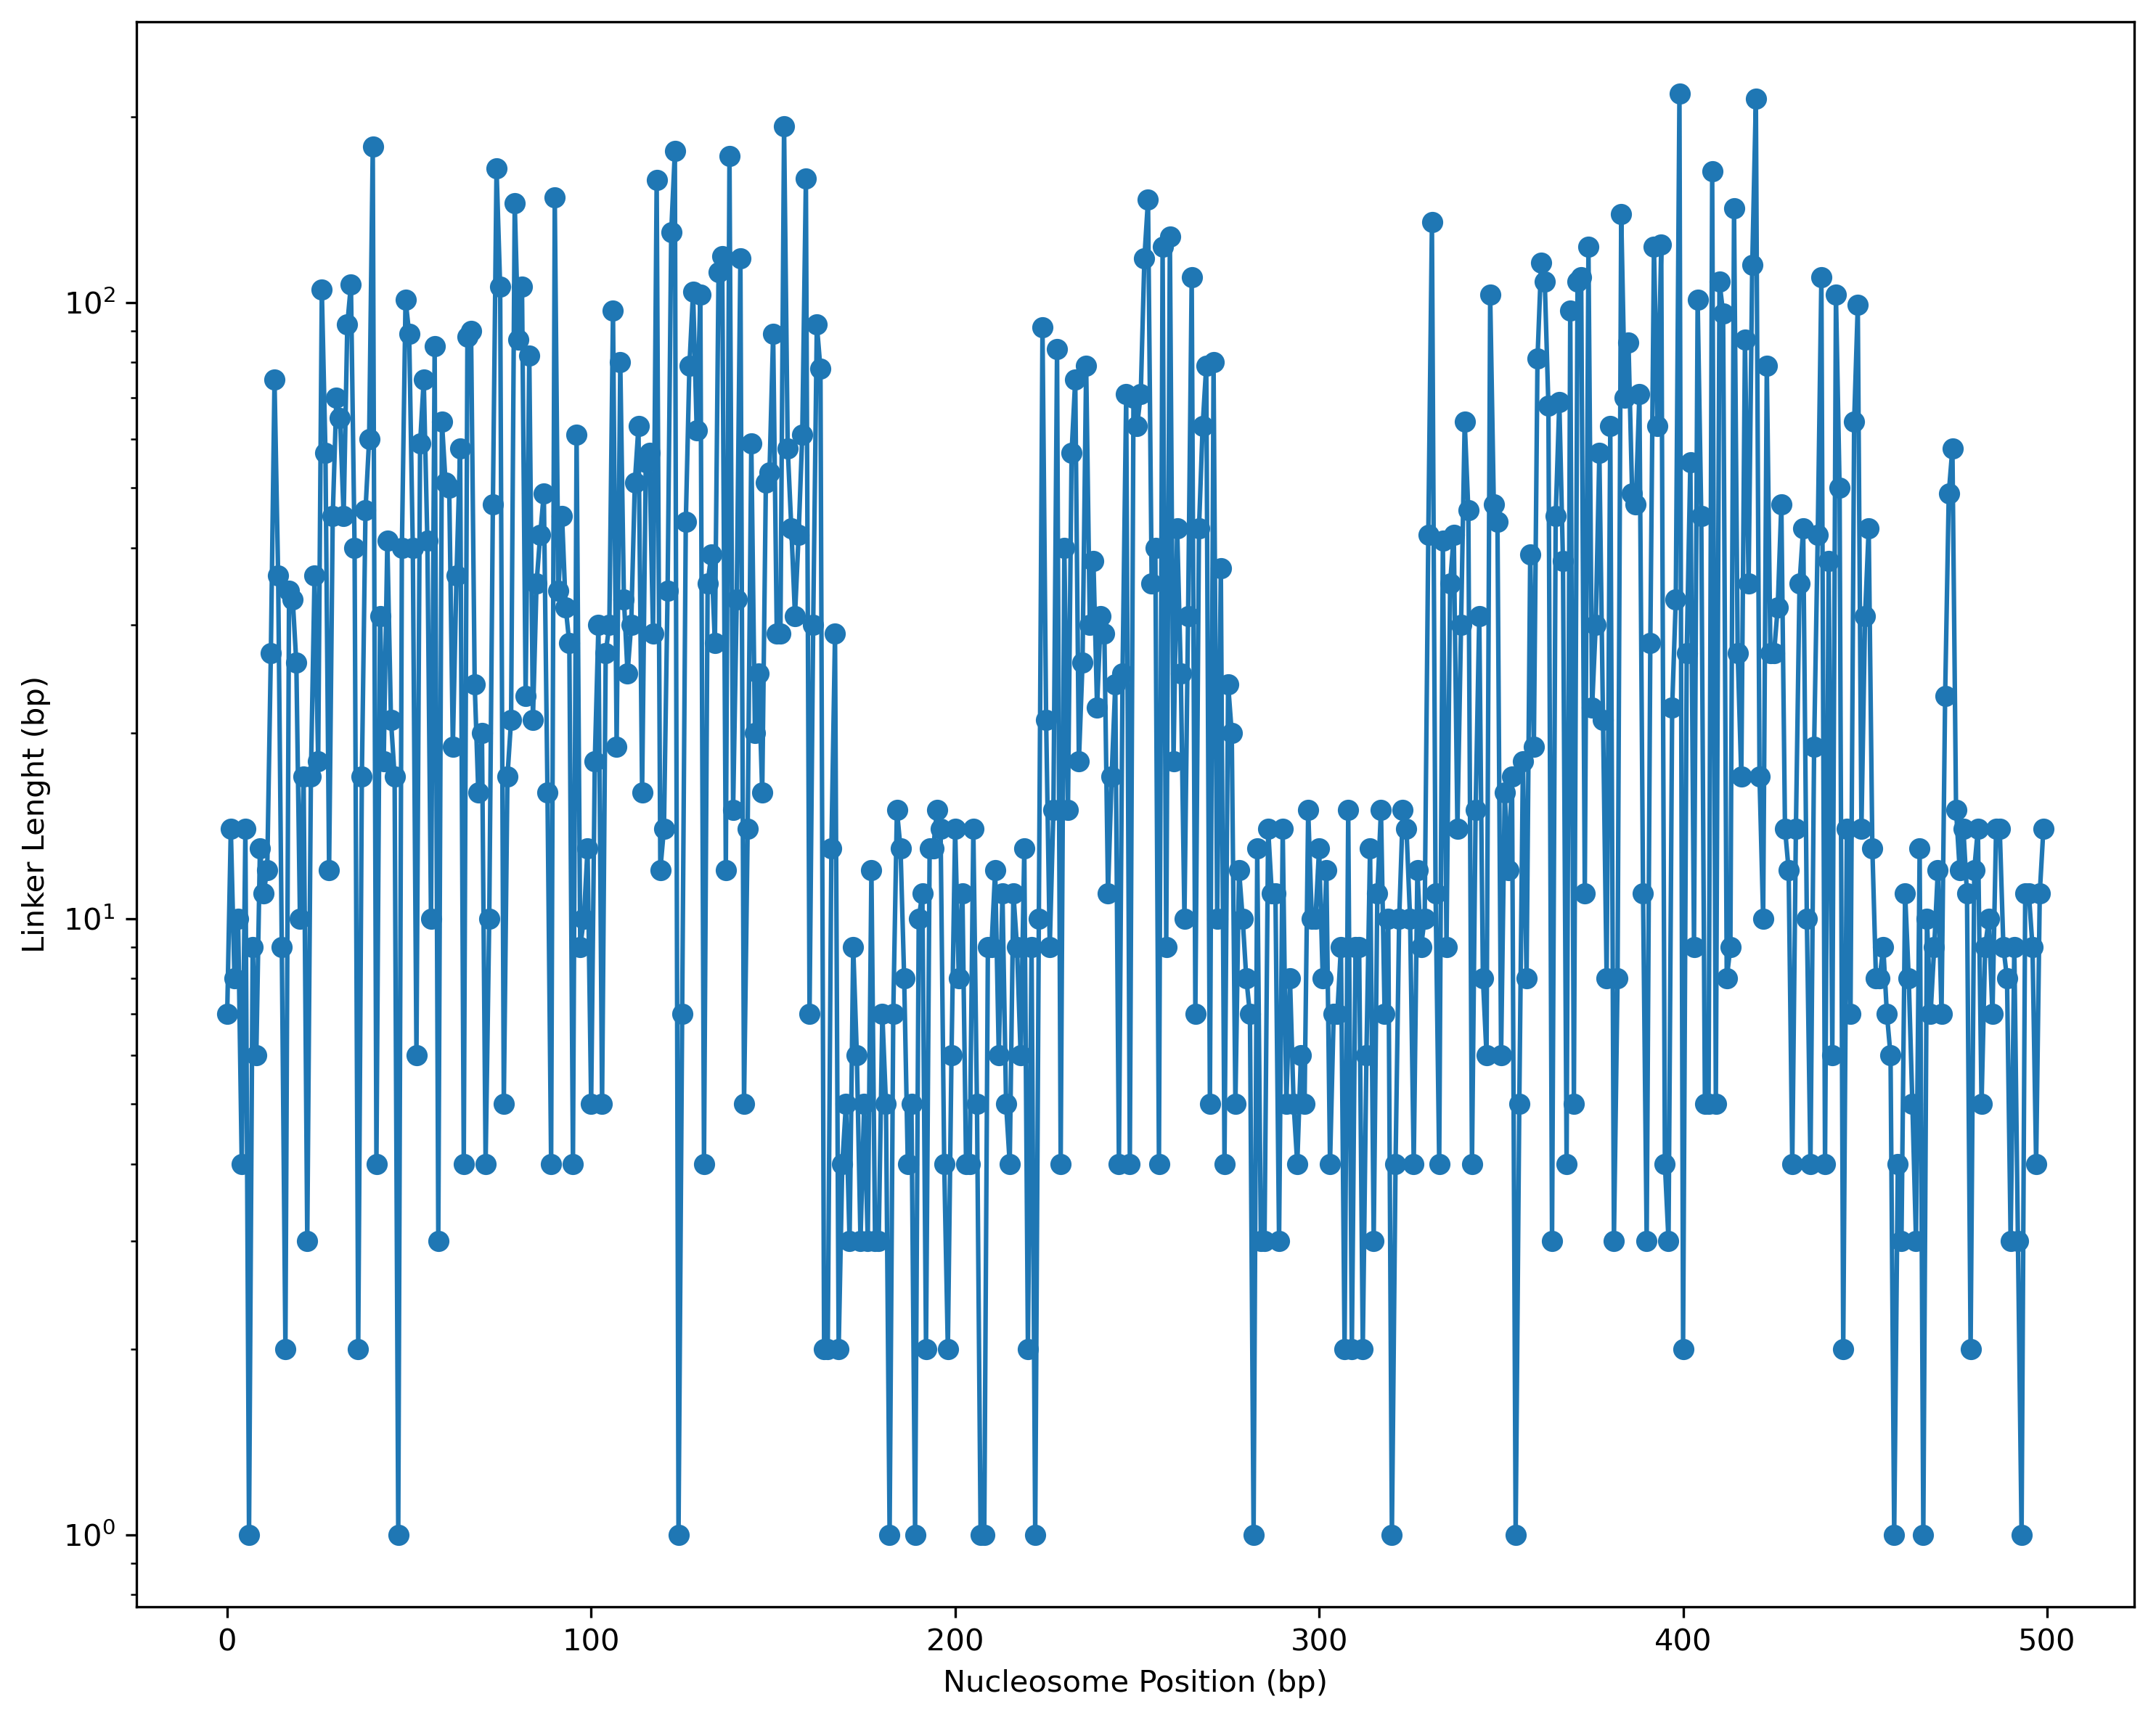

In [13]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()